## Import Dependencies 

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf          #join a pandas and plotpy
from plotly.offline import init_notebook_mode, plot, iplot
from pandas.plotting import scatter_matrix
import sklearn as sl

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated and will be removed in a future release



### Get Data form CSV

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris = iris.drop('Id', axis=1)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 5)

## Visualization Data

In [6]:
px.scatter(iris, x='Species', y='PetalWidthCm')

In [7]:
px.line(iris, x='Species', y='PetalWidthCm')

array([[<Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='Petal

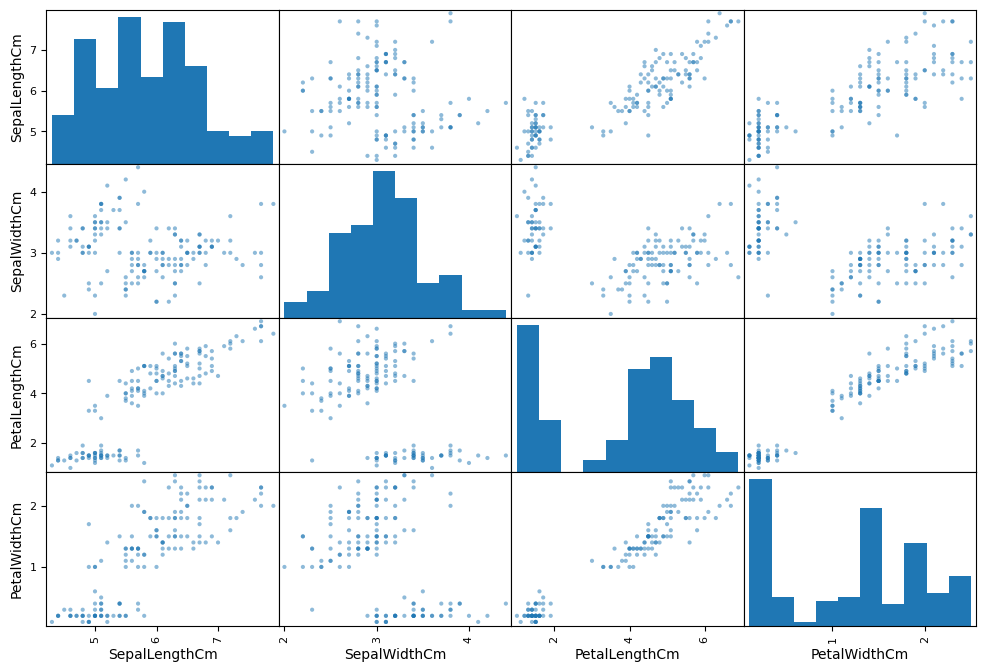

In [8]:
scatter_matrix(iris, figsize=(12,8))

In [9]:
iris = iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth',
                           'PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Change Feature and Labels

In [11]:
x= iris.drop('Species', axis=1)

In [12]:
y = iris['Species'].copy()

### Change a Label in Numerical Format

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Dived a data in test and train

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [16]:
x_train.shape

(120, 4)

In [17]:
y_train.size

120

## Apply a DecisionTreeClassifier Model

In [18]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import accuracy_score

prediction_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, prediction_dt)*100

In [20]:
accuracy_dt

100.0

### Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model,x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.28867513, 0.28867513, 0.40824829, 0.        , 0.        ,
       0.        , 0.40824829, 0.28867513, 0.28867513, 0.28867513])

In [22]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [23]:
prediction_dt

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

## Apply a KNeighborsClassifier Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
prediction_knn = knn_model.predict(x_test)

In [26]:
accuracy_knn = accuracy_score(y_test, prediction_knn)*100

In [27]:
accuracy_knn

100.0

### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_model,x_train, y_train, scoring='neg_mean_squared_error', cv=20)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.        , 0.40824829, 0.        , 0.        , 0.40824829,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.40824829, 0.57735027, 0.        , 0.        , 0.        ])

In [29]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [30]:
prediction_knn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

## Apply KMeans Model

In [31]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=3, random_state=2)
km_model.fit(x)

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3, random_state=2)

In [32]:
centers = km_model.cluster_centers_
centers

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [33]:
km_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Creating Catagory

In [34]:
catagory = ['Iris-Satosa','Iris-Versicolor','Iris-Virginica']

### Test a random data using DecisionTreeClassifier Model

In [35]:
data = 5.7,3,4.2,1.1

In [36]:
data_array = np.array([data])
data_array

array([[5.7, 3. , 4.2, 1.1]])

In [37]:
predic = dt_model.predict(data_array)

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [38]:
print(catagory[int(predic[0])])

Iris-Versicolor


### Test a random data using KNeighborsClassifier Model

In [39]:
predic = knn_model.predict(data_array)
predic

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array([1])

In [40]:
print(catagory[int(predic[0])])

Iris-Versicolor


### Test a random data using KMeans Model

In [41]:
predic = km_model.predict(data_array)

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [42]:
print(catagory[int(predic[0])])

Iris-Versicolor
